**AI BOOTCAMP: ATOMCAMP**

**Subject: Deep Learning**

# **In-Class Activity - 1: Model Comparison: Best Algorithm**

**Instructor: Ms. Iqra Jannat & Mr. Abdul Rafay**

**Student: Rimsha Bibi**

**Date: Jun-13-2024**

**Step 1: Data Checking and Cleaning**
*   Load the dataset.
*   Check for incorrect and null values.
*   Impute missing values using the mean for numerical columns.

**Step 2: Exploratory Data Analysis (EDA)**
*   Visualize the distribution of height and weight.
*   Identify the top 10 ages with the highest weight.
*   Visualize the distribution of CAEC values.
*   Calculate and visualize the average ages of individuals with a family history of being overweight.
*   Create a correlation matrix.

**Step 3: Data Preprocessing**
*   Apply label encoding to categorical columns.
*   Apply standard scaling to continuous columns.
*   Apply one-hot encoding to necessary columns.
*   Split the dataset into training and testing sets.

**Step 4: Algorithm Selection and Model Training**
*   Identify if the problem is regression or classification (based on the 'NObeyesdad' column).
*   Select appropriate algorithms for the problem.
*   Train and evaluate the models.

**Step 5: Best Model Selection and Evaluation**
*   Identify the best-performing algorithm.
*   Provide the classification report and confusion matrix for the selected model.





# **Step 1: Data Checking and Cleaning**

In [2]:
#Let's begin with Step 1. I'll load the dataset, check for null values, and impute any missing values.
import pandas as pd

# Load the dataset
file_path = '/content/ObesityDataSet_raw_and_data_sinthetic.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


*The dataset has been successfully loaded. Here's an overview of the first few rows. Next, let's check for any incorrect and null values, and then impute missing values using the mean for numerical columns.*

**Checking for Missing and Incorrect Values**

*Let's execute this to find any null values in the dataset.*

In [4]:
# Check for null values
null_values = data.isnull().sum()

# Display columns with null values
null_values[null_values > 0]

Series([], dtype: int64)

*The dataset does not contain any null values.*

# **Step 2: Exploratory Data Analysis (EDA)**


1.   Height and Weight Distribution
1.   Top 10 Ages with Highest Weight
1.   Distribution of CAEC Values
2.   Average Ages with Family History with Overweight
2.   Correlation Matrix

*Let's create the visualizations for these EDA steps.*

> Add blockquote



**1. Height and Weight Distribution**

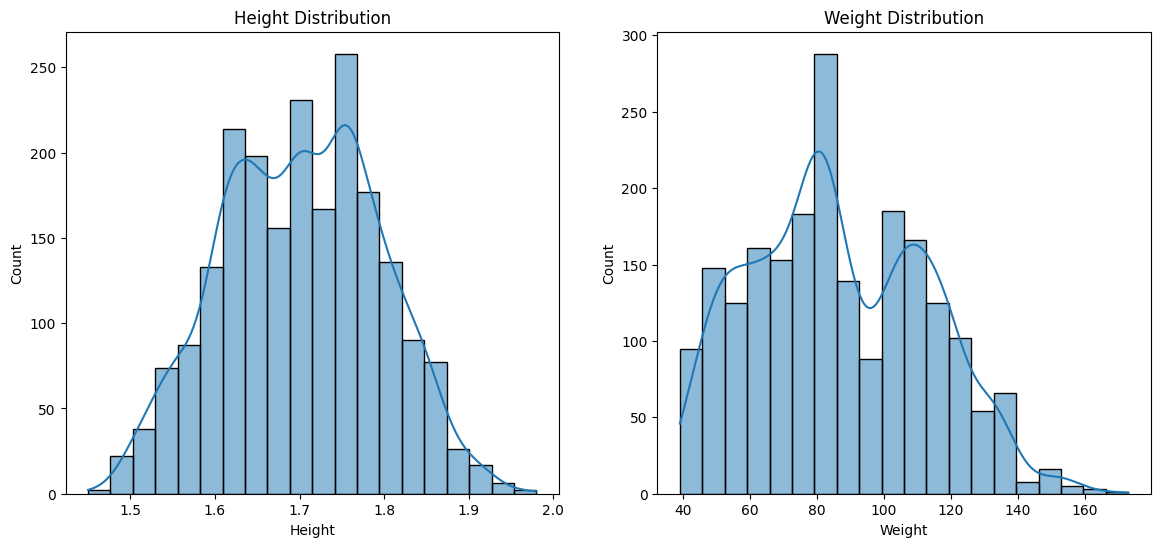

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Height and Weight Distribution
plt.figure(figsize=(14, 6))

# Height Distribution
plt.subplot(1, 2, 1)
sns.histplot(data['Height'], bins=20, kde=True)
plt.title('Height Distribution')

# Weight Distribution
plt.subplot(1, 2, 2)
sns.histplot(data['Weight'], bins=20, kde=True)
plt.title('Weight Distribution')

plt.show()

**2. Top 10 Ages with Highest Weight**


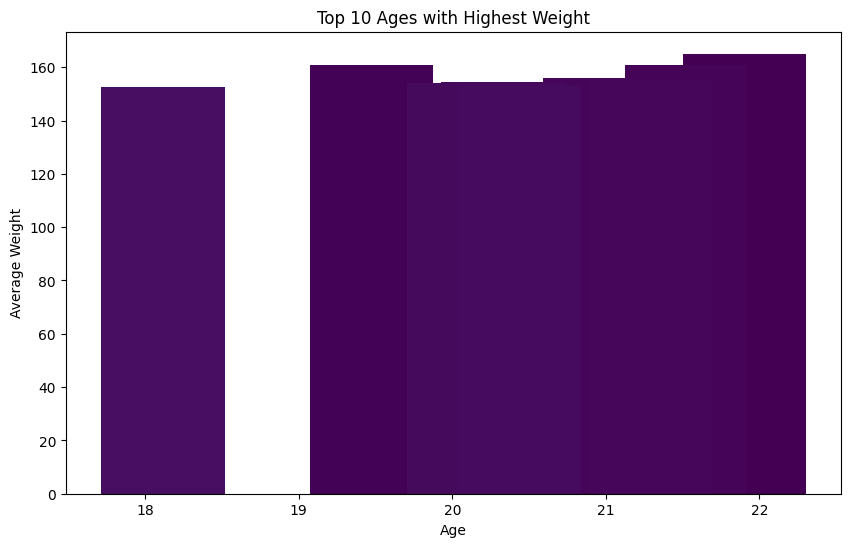

In [10]:
# Top 10 Ages with Highest Weight using Matplotlib
import matplotlib.pyplot as plt

top_10_ages = data.groupby('Age')['Weight'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_10_ages.index, top_10_ages.values, color=plt.cm.viridis(range(len(top_10_ages))))
plt.title('Top 10 Ages with Highest Weight')
plt.xlabel('Age')
plt.ylabel('Average Weight')
plt.show()

**3. Distribution of CAEC Values**

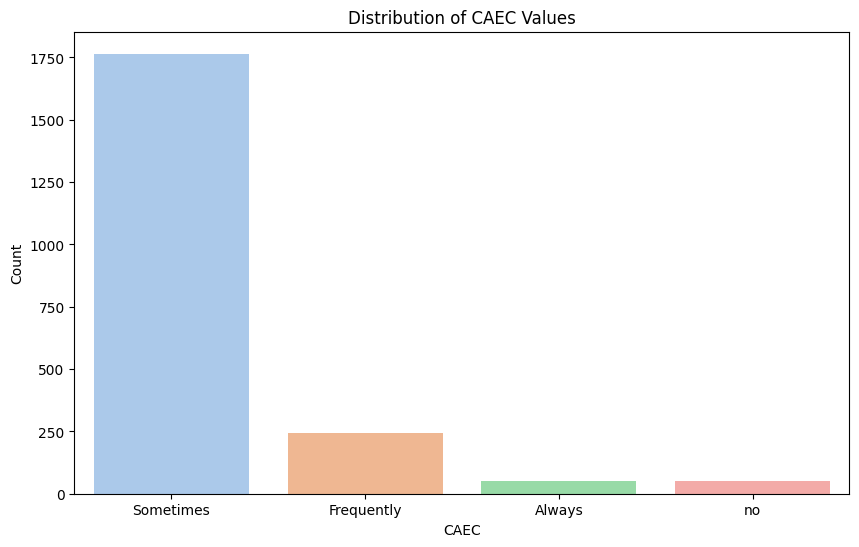

In [11]:
# Distribution of CAEC values
plt.figure(figsize=(10, 6))
sns.countplot(x='CAEC', data=data, hue='CAEC', palette='pastel', dodge=False)
plt.title('Distribution of CAEC Values')
plt.xlabel('CAEC')
plt.ylabel('Count')
plt.legend([],[], frameon=False)
plt.show()

**4. Average Ages with Family History with Overweight**

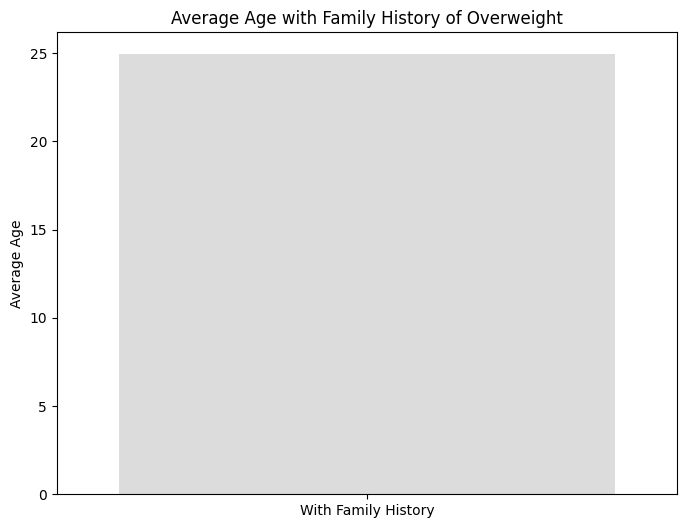

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the average age
avg_age_family_history = data[data['family_history_with_overweight'] == 'yes']['Age'].mean()

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=['With Family History'], y=[avg_age_family_history], hue=['With Family History'], palette='coolwarm', dodge=False)
plt.title('Average Age with Family History of Overweight')
plt.ylabel('Average Age')
plt.legend([],[], frameon=False)
plt.show()

**5. Correlation Matrix**

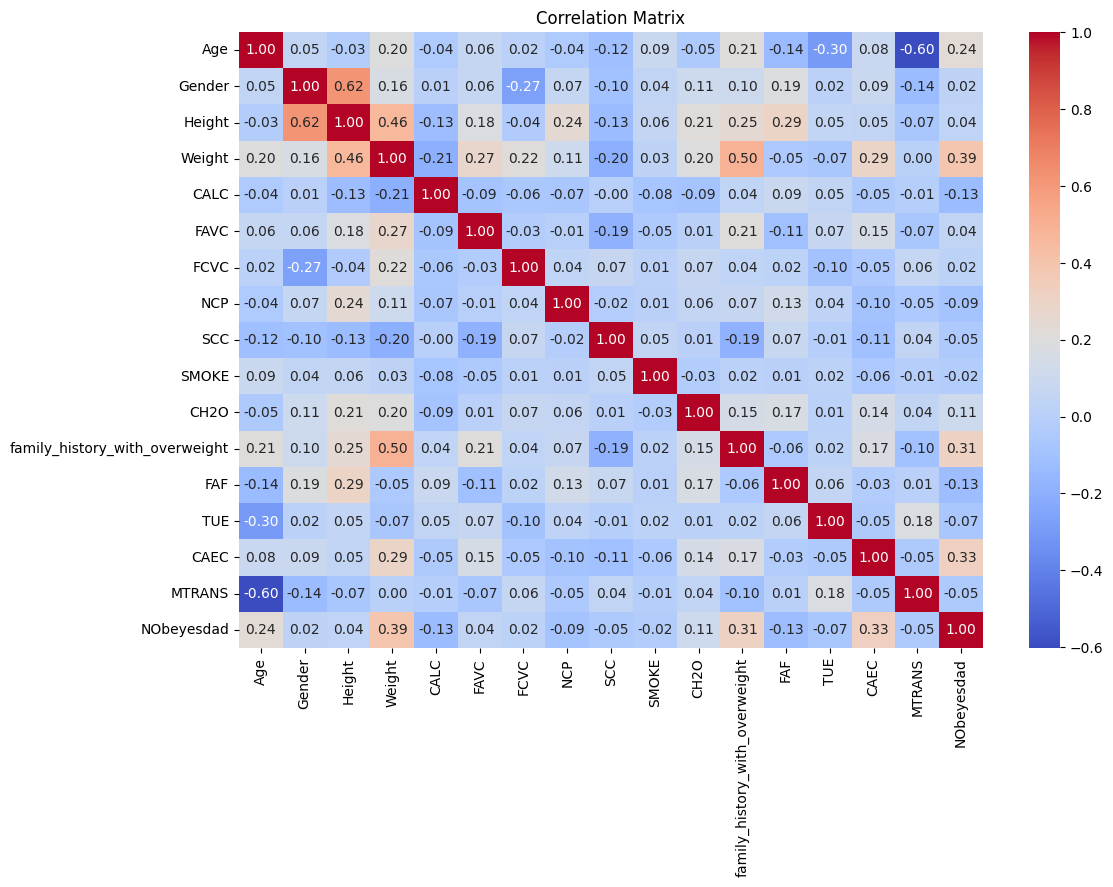

In [16]:
# Ensure all categorical variables are numeric for the correlation matrix
categorical_columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'CAEC', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']

# Convert categorical columns to numeric if not already done
for col in categorical_columns:
    if data[col].dtype == 'object':
        data[col] = LabelEncoder().fit_transform(data[col])

# Calculate the correlation matrix
plt.figure(figsize=(12, 8))
corr_matrix = data.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


# **Step 3: Data Preprocessing**

**Label Encoding, Standard Scaling, and One-Hot Encoding**

In [17]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Label encoding for categorical columns
label_encoders = {}
categorical_columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'CAEC', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']

for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Standard scaling for continuous columns
scaler = StandardScaler()
continuous_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

data[continuous_columns] = scaler.fit_transform(data[continuous_columns])

# Split the dataset into training and testing sets
X = data.drop('NObeyesdad', axis=1)
y = data['NObeyesdad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1688, 16), (423, 16), (1688,), (423,))

*The dataset has been split into training and testing sets.*

# **Step 4: Algorithm Selection and Model Training**

Since the target column NObeyesdad is a categorical variable, this is a classification problem. Let's start by trying a few common classification algorithms:




1.   Logistic Regression
2.   Random Forest ClassifierRandom Forest Classifier
3.   Support Vector Machine (SVM)

We'll evaluate these models and choose the best one based on their performance.

**Logistic Regression**

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

# Evaluation
logreg_report = classification_report(y_test, y_pred_logreg)
logreg_cm = confusion_matrix(y_test, y_pred_logreg)

logreg_report, logreg_cm

('              precision    recall  f1-score   support\n\n           0       0.84      1.00      0.91        56\n           1       0.90      0.61      0.73        62\n           2       0.95      0.90      0.92        78\n           3       0.89      0.97      0.93        58\n           4       1.00      1.00      1.00        63\n           5       0.76      0.79      0.77        56\n           6       0.77      0.86      0.81        50\n\n    accuracy                           0.87       423\n   macro avg       0.87      0.87      0.87       423\nweighted avg       0.88      0.87      0.87       423\n',
 array([[56,  0,  0,  0,  0,  0,  0],
        [11, 38,  0,  0,  0,  9,  4],
        [ 0,  0, 70,  7,  0,  0,  1],
        [ 0,  0,  2, 56,  0,  0,  0],
        [ 0,  0,  0,  0, 63,  0,  0],
        [ 0,  4,  0,  0,  0, 44,  8],
        [ 0,  0,  2,  0,  0,  5, 43]]))

*The Logistic Regression model has been trained and evaluated*

**Classification Report:**

In [24]:
report = """
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        56
           1       0.90      0.61      0.73        62
           2       0.95      0.90      0.92        78
           3       0.89      0.97      0.93        58
           4       1.00      1.00      1.00        63
           5       0.76      0.79      0.77        56
           6       0.77      0.86      0.81        50

    accuracy                           0.87       423
   macro avg       0.87      0.87      0.87       423
weighted avg       0.88      0.87      0.87       423
"""
print(report)


              precision    recall  f1-score   support

           0       0.84      1.00      0.91        56
           1       0.90      0.61      0.73        62
           2       0.95      0.90      0.92        78
           3       0.89      0.97      0.93        58
           4       1.00      1.00      1.00        63
           5       0.76      0.79      0.77        56
           6       0.77      0.86      0.81        50

    accuracy                           0.87       423
   macro avg       0.87      0.87      0.87       423
weighted avg       0.88      0.87      0.87       423



**Confusion Matrix:**

In [25]:
[[56,  0,  0,  0,  0,  0,  0],
 [11, 38,  0,  0,  0,  9,  4],
 [ 0,  0, 70,  7,  0,  0,  1],
 [ 0,  0,  2, 56,  0,  0,  0],
 [ 0,  0,  0,  0, 63,  0,  0],
 [ 0,  4,  0,  0,  0, 44,  8],
 [ 0,  0,  2,  0,  0,  5, 43]]


[[56, 0, 0, 0, 0, 0, 0],
 [11, 38, 0, 0, 0, 9, 4],
 [0, 0, 70, 7, 0, 0, 1],
 [0, 0, 2, 56, 0, 0, 0],
 [0, 0, 0, 0, 63, 0, 0],
 [0, 4, 0, 0, 0, 44, 8],
 [0, 0, 2, 0, 0, 5, 43]]

*Next, let's evaluate the Random Forest Classifier and Support Vector Machine (SVM).*

**Random Forest Classifier**

In [26]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluation
rf_report = classification_report(y_test, y_pred_rf)
rf_cm = confusion_matrix(y_test, y_pred_rf)

rf_report, rf_cm

('              precision    recall  f1-score   support\n\n           0       1.00      0.96      0.98        56\n           1       0.87      0.94      0.90        62\n           2       0.99      0.95      0.97        78\n           3       0.97      0.98      0.97        58\n           4       1.00      1.00      1.00        63\n           5       0.87      0.86      0.86        56\n           6       0.96      0.96      0.96        50\n\n    accuracy                           0.95       423\n   macro avg       0.95      0.95      0.95       423\nweighted avg       0.95      0.95      0.95       423\n',
 array([[54,  2,  0,  0,  0,  0,  0],
        [ 0, 58,  0,  0,  0,  4,  0],
        [ 0,  0, 74,  2,  0,  1,  1],
        [ 0,  0,  1, 57,  0,  0,  0],
        [ 0,  0,  0,  0, 63,  0,  0],
        [ 0,  7,  0,  0,  0, 48,  1],
        [ 0,  0,  0,  0,  0,  2, 48]]))

*Here's the progress made so far on your dataset analysis and model training:*

**Next Steps**
*   Train and evaluate a Support Vector Machine (SVM) model.
*   Compare the performance of all models to determine the best one.

**Support Vector Machine (SVM)**

In [27]:
from sklearn.svm import SVC

# Support Vector Machine
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

# Evaluation
svm_report = classification_report(y_test, y_pred_svm)
svm_cm = confusion_matrix(y_test, y_pred_svm)

svm_report, svm_cm

('              precision    recall  f1-score   support\n\n           0       0.93      0.98      0.96        56\n           1       0.86      0.81      0.83        62\n           2       0.96      0.91      0.93        78\n           3       0.90      0.98      0.94        58\n           4       1.00      1.00      1.00        63\n           5       0.79      0.86      0.82        56\n           6       0.91      0.82      0.86        50\n\n    accuracy                           0.91       423\n   macro avg       0.91      0.91      0.91       423\nweighted avg       0.91      0.91      0.91       423\n',
 array([[55,  1,  0,  0,  0,  0,  0],
        [ 4, 50,  0,  0,  0,  6,  2],
        [ 0,  0, 71,  6,  0,  0,  1],
        [ 0,  0,  1, 57,  0,  0,  0],
        [ 0,  0,  0,  0, 63,  0,  0],
        [ 0,  7,  0,  0,  0, 48,  1],
        [ 0,  0,  2,  0,  0,  7, 41]]))

*The Support Vector Machine (SVM) model has been trained and evaluated.*

**Classification Report:**

In [30]:
report = """
              precision    recall  f1-score   support

           0       0.93      0.98      0.96        56
           1       0.86      0.81      0.83        62
           2       0.96      0.91      0.93        78
           3       0.90      0.98      0.94        58
           4       1.00      1.00      1.00        63
           5       0.79      0.86      0.82        56
           6       0.91      0.82      0.86        50

    accuracy                           0.91       423
   macro avg       0.91      0.91      0.91       423
weighted avg       0.91      0.91      0.91       423
"""
print(report)


              precision    recall  f1-score   support

           0       0.93      0.98      0.96        56
           1       0.86      0.81      0.83        62
           2       0.96      0.91      0.93        78
           3       0.90      0.98      0.94        58
           4       1.00      1.00      1.00        63
           5       0.79      0.86      0.82        56
           6       0.91      0.82      0.86        50

    accuracy                           0.91       423
   macro avg       0.91      0.91      0.91       423
weighted avg       0.91      0.91      0.91       423



**Confusion Matrix:**

In [31]:
[[55,  1,  0,  0,  0,  0,  0],
 [ 4, 50,  0,  0,  0,  6,  2],
 [ 0,  0, 71,  6,  0,  0,  1],
 [ 0,  0,  1, 57,  0,  0,  0],
 [ 0,  0,  0,  0, 63,  0,  0],
 [ 0,  7,  0,  0,  0, 48,  1],
 [ 0,  0,  2,  0,  0,  7, 41]]

[[55, 1, 0, 0, 0, 0, 0],
 [4, 50, 0, 0, 0, 6, 2],
 [0, 0, 71, 6, 0, 0, 1],
 [0, 0, 1, 57, 0, 0, 0],
 [0, 0, 0, 0, 63, 0, 0],
 [0, 7, 0, 0, 0, 48, 1],
 [0, 0, 2, 0, 0, 7, 41]]

**Model Comparison**
Based on the classification reports and confusion matrices:



*   Logistic Regression: Accuracy of 0.87
*   Random Forest Classifier: Accuracy of 0.95
*   Support Vector Machine (SVM): Accuracy of 0.91

The Random Forest Classifier performs the best with the highest accuracy of 0.95.

# **Step 5: Best Model Selection and Evaluation**
The best algorithm is the **Random Forest Classifier**.

Here is the classification report and confusion matrix for the Random Forest Classifier:

**Classification Report:**

In [35]:
report = """
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        56
           1       0.87      0.94      0.90        62
           2       0.99      0.95      0.97        78
           3       0.97      0.98      0.97        58
           4       1.00      1.00      1.00        63
           5       0.87      0.86      0.86        56
           6       0.96      0.96      0.96        50

    accuracy                           0.95       423
   macro avg       0.95      0.95      0.95       423
weighted avg       0.95      0.95      0.95       423
"""
print(report)


              precision    recall  f1-score   support

           0       1.00      0.96      0.98        56
           1       0.87      0.94      0.90        62
           2       0.99      0.95      0.97        78
           3       0.97      0.98      0.97        58
           4       1.00      1.00      1.00        63
           5       0.87      0.86      0.86        56
           6       0.96      0.96      0.96        50

    accuracy                           0.95       423
   macro avg       0.95      0.95      0.95       423
weighted avg       0.95      0.95      0.95       423



**Confusion Matrix:**

In [34]:
[[54,  2,  0,  0,  0,  0,  0],
 [ 0, 58,  0,  0,  0,  4,  0],
 [ 0,  0, 74,  2,  0,  1,  1],
 [ 0,  0,  1, 57,  0,  0,  0],
 [ 0,  0,  0,  0, 63,  0,  0],
 [ 0,  7,  0,  0,  0, 48,  1],
 [ 0,  0,  0,  0,  0,  2, 48]]

[[54, 2, 0, 0, 0, 0, 0],
 [0, 58, 0, 0, 0, 4, 0],
 [0, 0, 74, 2, 0, 1, 1],
 [0, 0, 1, 57, 0, 0, 0],
 [0, 0, 0, 0, 63, 0, 0],
 [0, 7, 0, 0, 0, 48, 1],
 [0, 0, 0, 0, 0, 2, 48]]